In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats =np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs =zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import the request library
import requests

#Import the API key
from config import weather_api_key

#Import the datetime module from the datetime library
from datetime import datetime
from citipy import citipy 

In [5]:
# Create a list for holdimg the cities.
cities =[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, then we will ad it to the cities list.
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count.
len(cities)
    

614

In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=018f7a92529752ee2c358872f1c1c657


In [7]:
# Create an empty list to hold the weather data.
city_data =[]
#print the beginning of the logging
print("Begining Data Retrieval        ")
print("--------------------------------")

#Create counters
record_count = 1
set_count =1

#Loop through all the cities in our list
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50== 0 and i >=50):
        set_count +=1
        record_count =1
    # Create endpoint URL with each city
    city_url =url + "&q=" + "i"
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i >=50):
        set_count +=1
        record_count =1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count +=1 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    #Appnd the city information into city_data list.
        city_data.append({"city": city.title(),
                    "Country": city_country,
                    "Date": city_date,
                     "Lat": city_lat,
                     "Lng":city_lng,
                     "Max Temp": city_max_temp,
                     "Humidity": city_humidity,
                     "Cloudiness": city_clouds,
                     "Wind Speed":city_wind})
    
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data loading is complete.
    print("-------------------------------")
    print("Data Retrieval Complete        ")
    print("-------------------------------")

Begining Data Retrieval        
--------------------------------
processing Record 1 of Set 13 | ushuaia
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 2 of Set 13 | oloron-sainte-marie
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 3 of Set 13 | grand river south east
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 4 of Set 13 | aflu
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 5 of Set 13 | chuy
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 6 of Set 13 | cape town
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 7 of Set 13 | castro
-

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 11 of Set 14 | hilo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 12 of Set 14 | pisco
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 13 of Set 14 | bilgoraj
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 14 of Set 14 | port alfred
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 15 of Set 14 | ulverstone
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 16 of Set 14 | upernavik
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 17 of Set 14 | taksimo
-------------------------------
Data

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 20 of Set 15 | oranjemund
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 21 of Set 15 | attawapiskat
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 22 of Set 15 | longyearbyen
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 23 of Set 15 | copiapo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 24 of Set 15 | antofagasta
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 25 of Set 15 | bandarbeyla
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 26 of Set 15 | 

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 29 of Set 16 | hobart
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 30 of Set 16 | poronaysk
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 31 of Set 16 | grootfontein
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 32 of Set 16 | hasaki
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 33 of Set 16 | kahului
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 34 of Set 16 | esperance
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 35 of Set 16 | liuzhou
-------------------------------
Da

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 39 of Set 17 | ilo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 40 of Set 17 | port hardy
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 41 of Set 17 | constitucion
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 42 of Set 17 | prince rupert
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 43 of Set 17 | hamilton
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 44 of Set 17 | suslovo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 45 of Set 17 | hermanus
-----------------------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 50 of Set 18 | benton harbor
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 1 of Set 19 | basoko
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 2 of Set 19 | saint-philippe
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 3 of Set 19 | horodok
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 4 of Set 19 | rizhao
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 5 of Set 19 | chumikan
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 6 of Set 19 | acarau
-------------------------------
Data

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 10 of Set 20 | virden
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 11 of Set 20 | cartagena
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 12 of Set 20 | asau
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 13 of Set 20 | villarrica
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 14 of Set 20 | ca mau
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 15 of Set 20 | riyadh
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 16 of Set 20 | kavaratti
-------------------------------
Data Ret

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 19 of Set 21 | margate
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 20 of Set 21 | chapais
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 21 of Set 21 | papara
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 22 of Set 21 | sur
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 23 of Set 21 | victoria
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 24 of Set 21 | monrovia
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 25 of Set 21 | oussouye
-------------------------------
Data Retrie

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 28 of Set 22 | rassvet
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 29 of Set 22 | tual
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 30 of Set 22 | vaitupu
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 31 of Set 22 | yulara
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 32 of Set 22 | hobyo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 33 of Set 22 | chilca
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 34 of Set 22 | jacareacanga
---------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 39 of Set 23 | leua
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 40 of Set 23 | tazovskiy
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 41 of Set 23 | saint anthony
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 42 of Set 23 | grand centre
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 43 of Set 23 | pop
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 44 of Set 23 | bathsheba
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 45 of Set 23 | kiunga
------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 49 of Set 24 | san policarpo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 50 of Set 24 | pareora
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 1 of Set 25 | roald
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 2 of Set 25 | kapoeta
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 3 of Set 25 | colares
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 4 of Set 25 | nemuro
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 5 of Set 25 | tasbuget
City not found. Skipping...
--------------

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,city,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-10-09 05:57:44,-54.80,-68.30,41.00,75,75,5.82
1,Oloron-Sainte-Marie,FR,2020-10-09 05:57:44,43.19,-0.61,59.00,100,90,3.36
2,Chuy,UY,2020-10-09 05:57:45,-33.70,-53.46,47.68,76,17,5.61
3,Cape Town,ZA,2020-10-09 05:56:31,-33.93,18.42,57.99,93,75,14.99
4,Castro,BR,2020-10-09 05:57:46,-24.79,-50.01,61.50,97,98,5.53
5,Mataura,NZ,2020-10-09 05:57:41,-46.19,168.86,57.00,56,0,4.00
6,Bredasdorp,ZA,2020-10-09 05:57:47,-34.53,20.04,53.60,87,99,13.87
7,Vaini,TO,2020-10-09 05:57:41,-21.20,-175.20,78.80,88,40,8.05
8,Jamestown,US,2020-10-09 05:57:40,42.10,-79.24,46.40,75,90,6.93
9,Tahlequah,US,2020-10-09 05:57:47,35.92,-94.97,64.99,93,40,5.79


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into CSV

city_data_df.to_csv(output_data_file,index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module
import time
# Get today's date in seconds.
today = time.time()
today

1602223177.765923

In [12]:
today = time.strftime("%x")
today

'10/09/20'

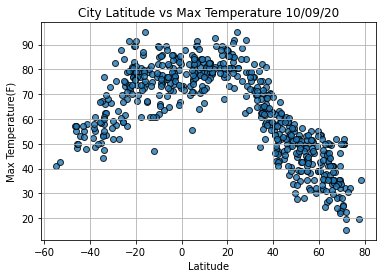

In [13]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

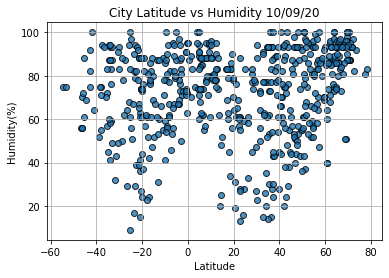

In [14]:
# Build the scatter plot for latitude vs Humidity.
plt.scatter(lats,
           humidity, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

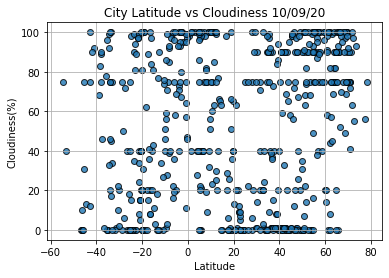

In [15]:
# Build the scatter plot for latitude vs Cloudiness.
plt.scatter(lats,
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

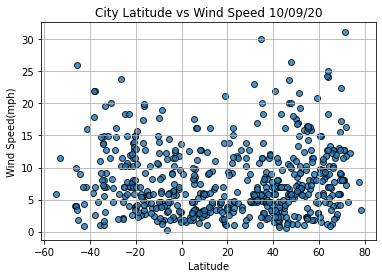

In [16]:
# Build the scatter plot for latitude vs Wind Speed.
plt.scatter(lats,
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [17]:
# Import linear regression from Scipy stats module.
from scipy.stats import linregress

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err)= linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

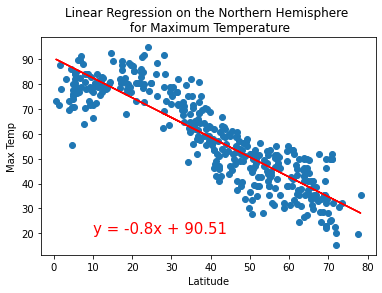

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10,20) )

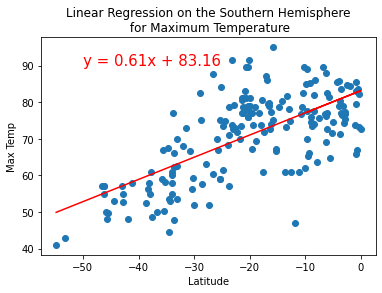

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))


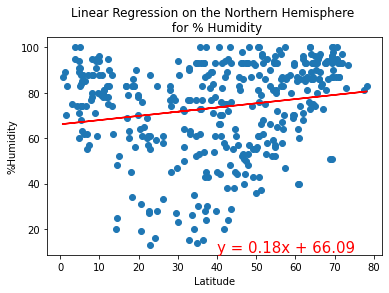

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Humidity', '%Humidity', (40,10))

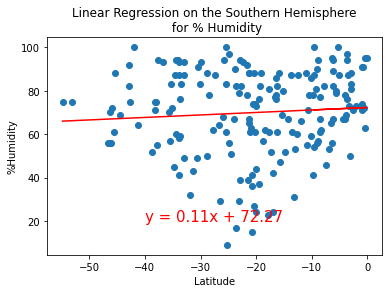

In [23]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\n for % Humidity', '%Humidity', (-40,20))

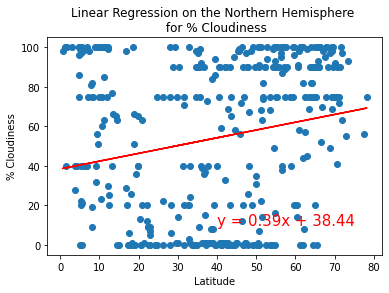

In [24]:
# # Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (40,10))

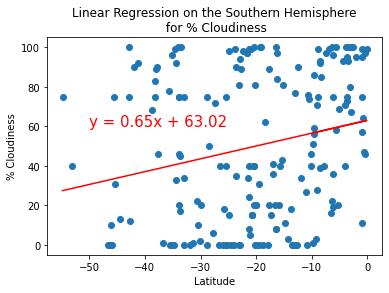

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness', (-50,60))

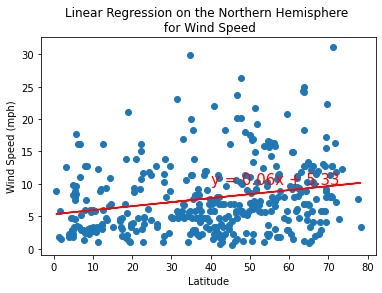

In [26]:
# # Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (40,10))

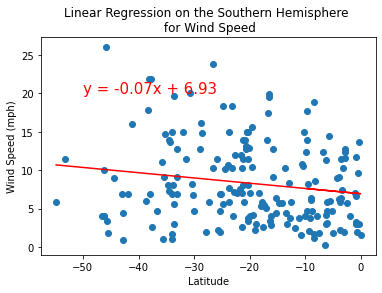

In [27]:
# # Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (-50,20))